### Reading, understanding and visualizing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
bikes=pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Null value check

In [3]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### We can see that there are no null values in the dataset

#### Dropping unnecessary columns

##### instant, dteday, casual and registered are the columns that are not necessary for the analysis. They can be dropped

In [4]:
bikes=bikes.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

In [5]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Numerical and Categorical columns

In [6]:
bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [7]:
num_col= ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
cat_col= ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

#### Outlier Check

##### We look for outliers in numerical as well as categorical columns

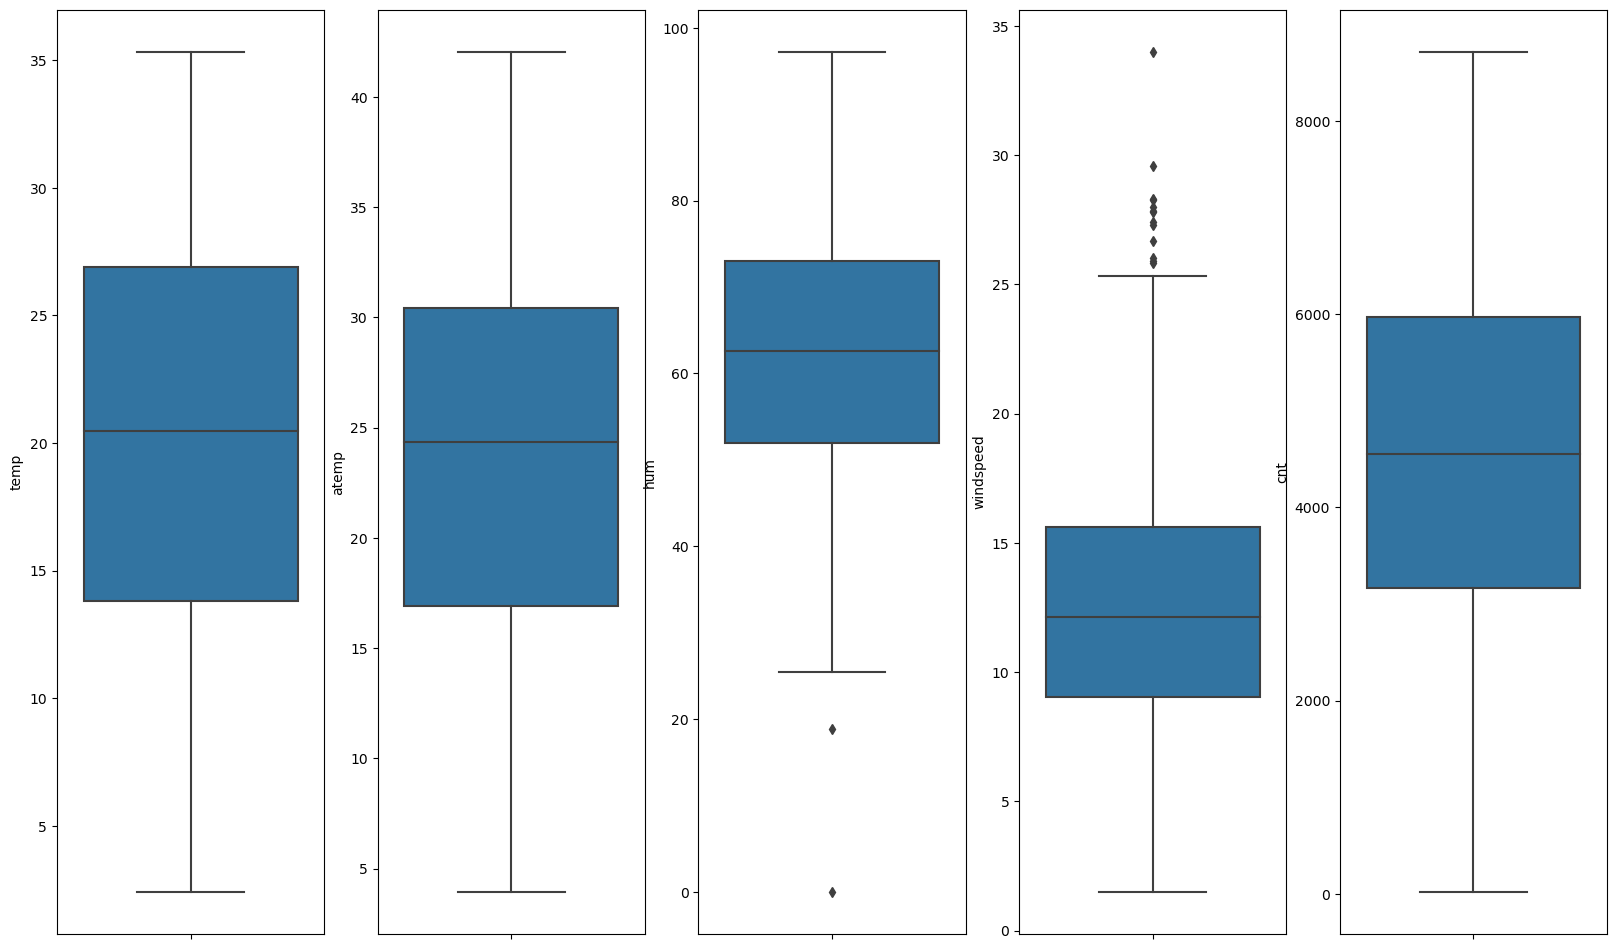

In [8]:
#numerical col
plt.figure(figsize=(20,12))
j=1
for i in num_col:
    plt.subplot(1,5,j)
    sns.boxplot(y=bikes[i])
    j+=1
    

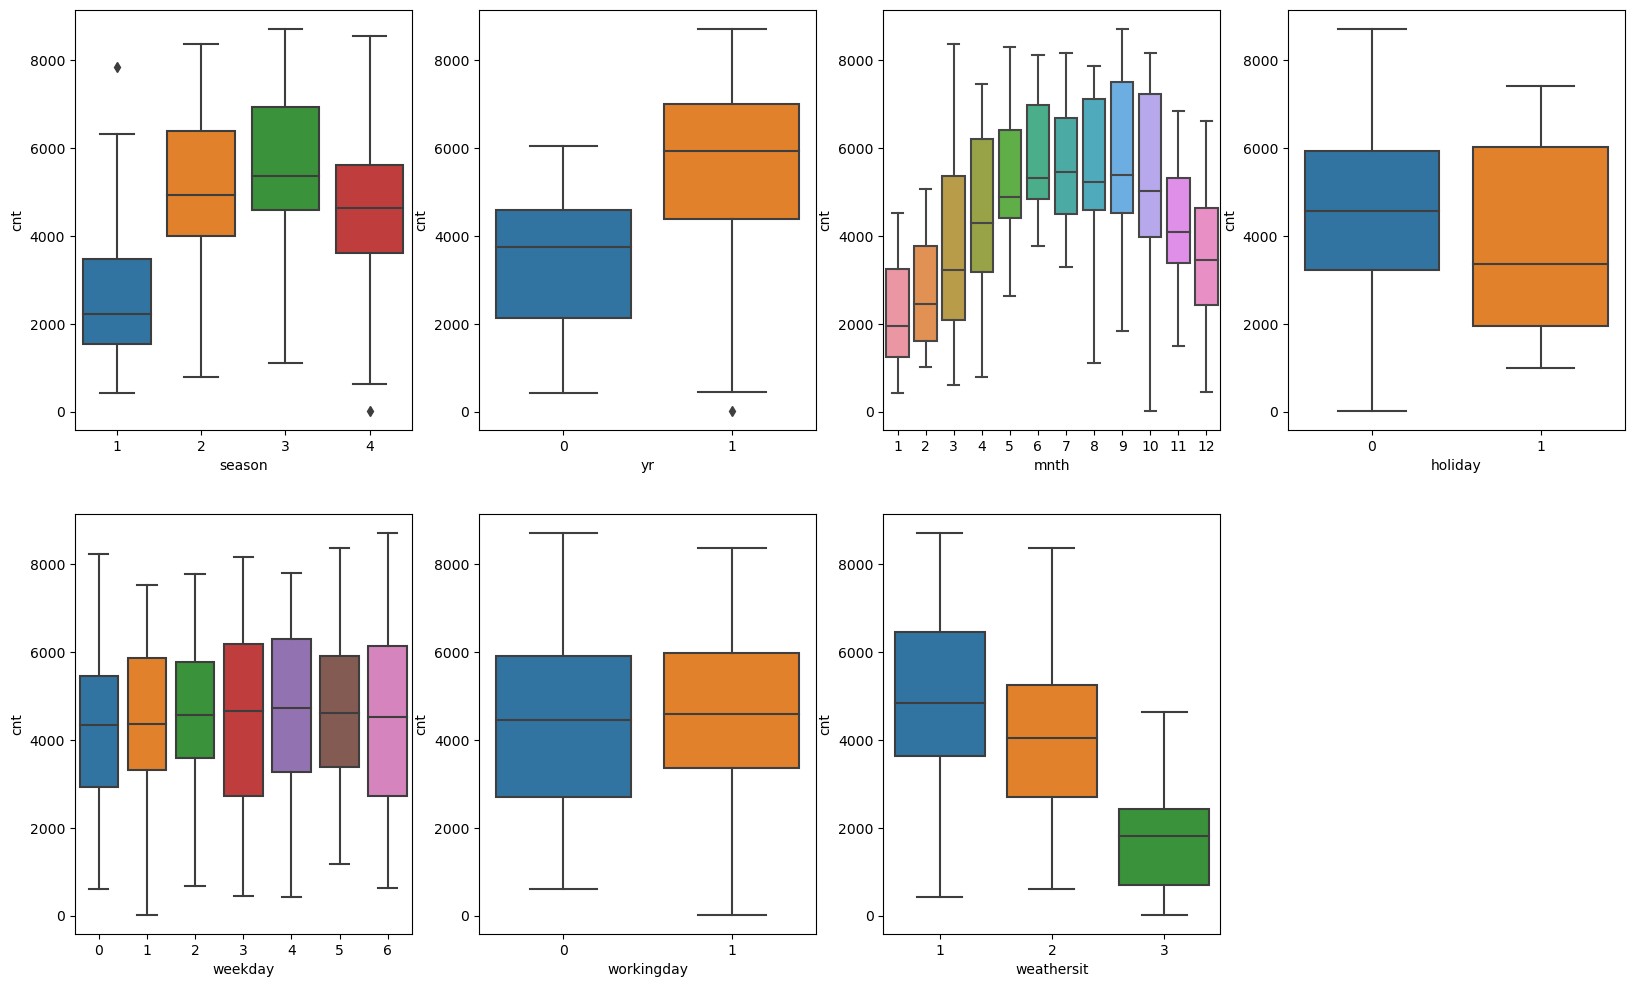

In [9]:
#cat col
plt.figure(figsize=(20,12))
j=1
for i in cat_col:
    plt.subplot(2,4,j)
    sns.boxplot(x=bikes[i], y='cnt', data=bikes)
    j+=1

##### There are no outliers in the dataset

##### Also, some data analysis can be done from the boxplots obtained above

##### 1) The number of bikes rented are more during 'fall' season and less during 'spring' season
##### 2) The bike count is more in 2019 over 2018
##### 3) August, September and October had more number of bike hires
##### 4) The count is more when there is a clear sky

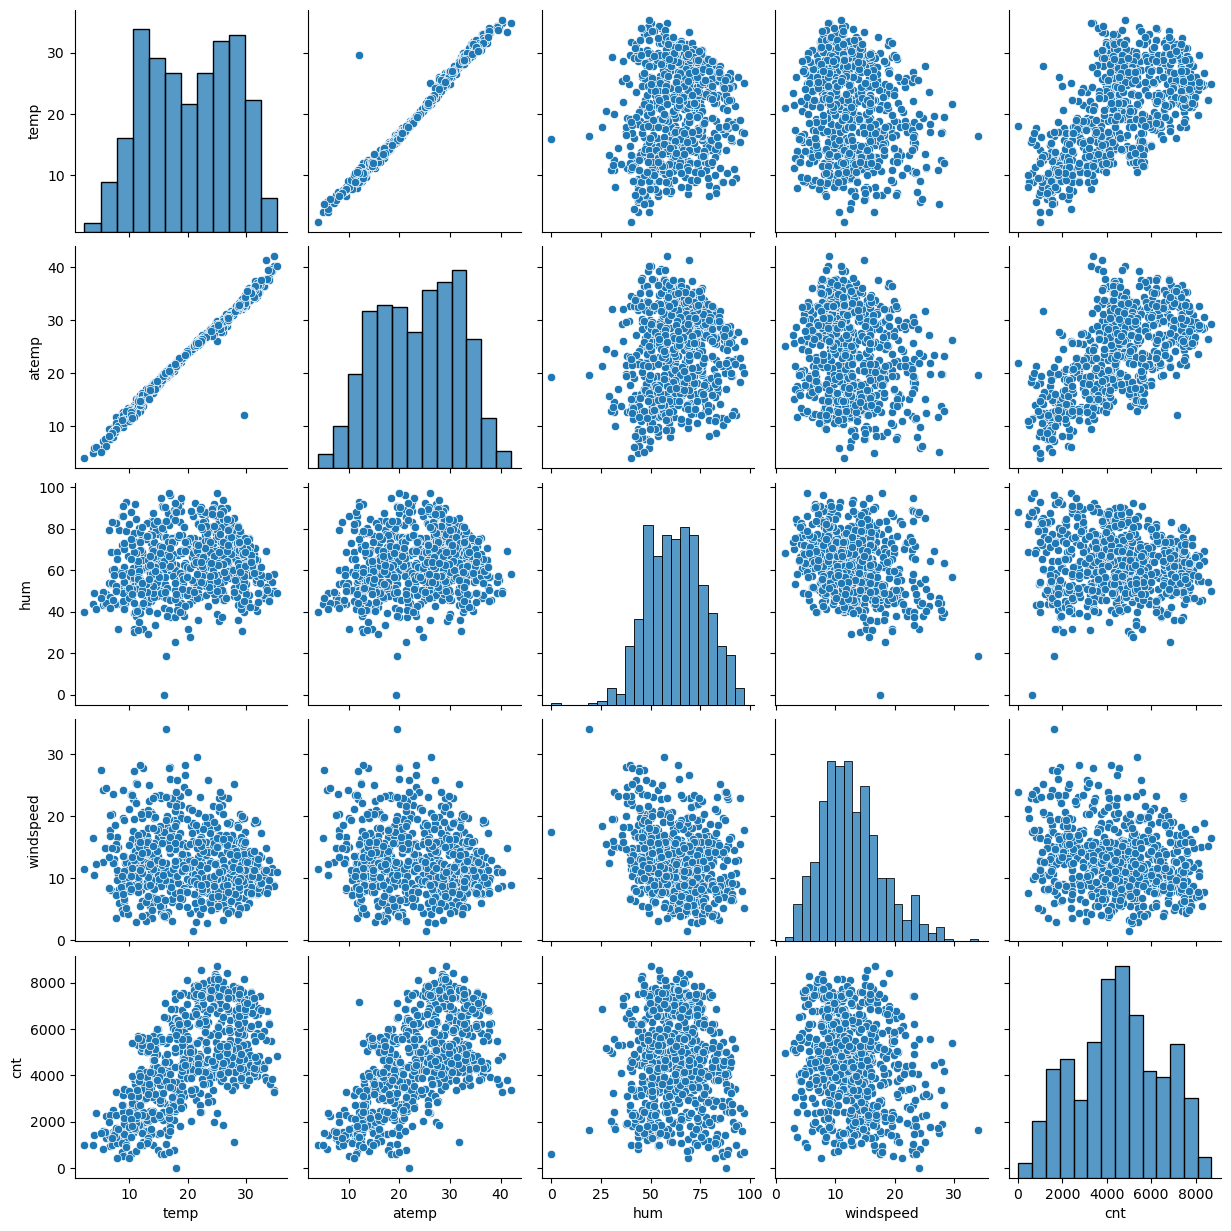

In [10]:
#Visualizing the numerical variables
sns.pairplot(bikes[num_col])
plt.show()

##### From the above pairplot, we can observer that 'cnt' is more related to 'temp' and 'atemp' and the plot looks more linear

<Axes: >

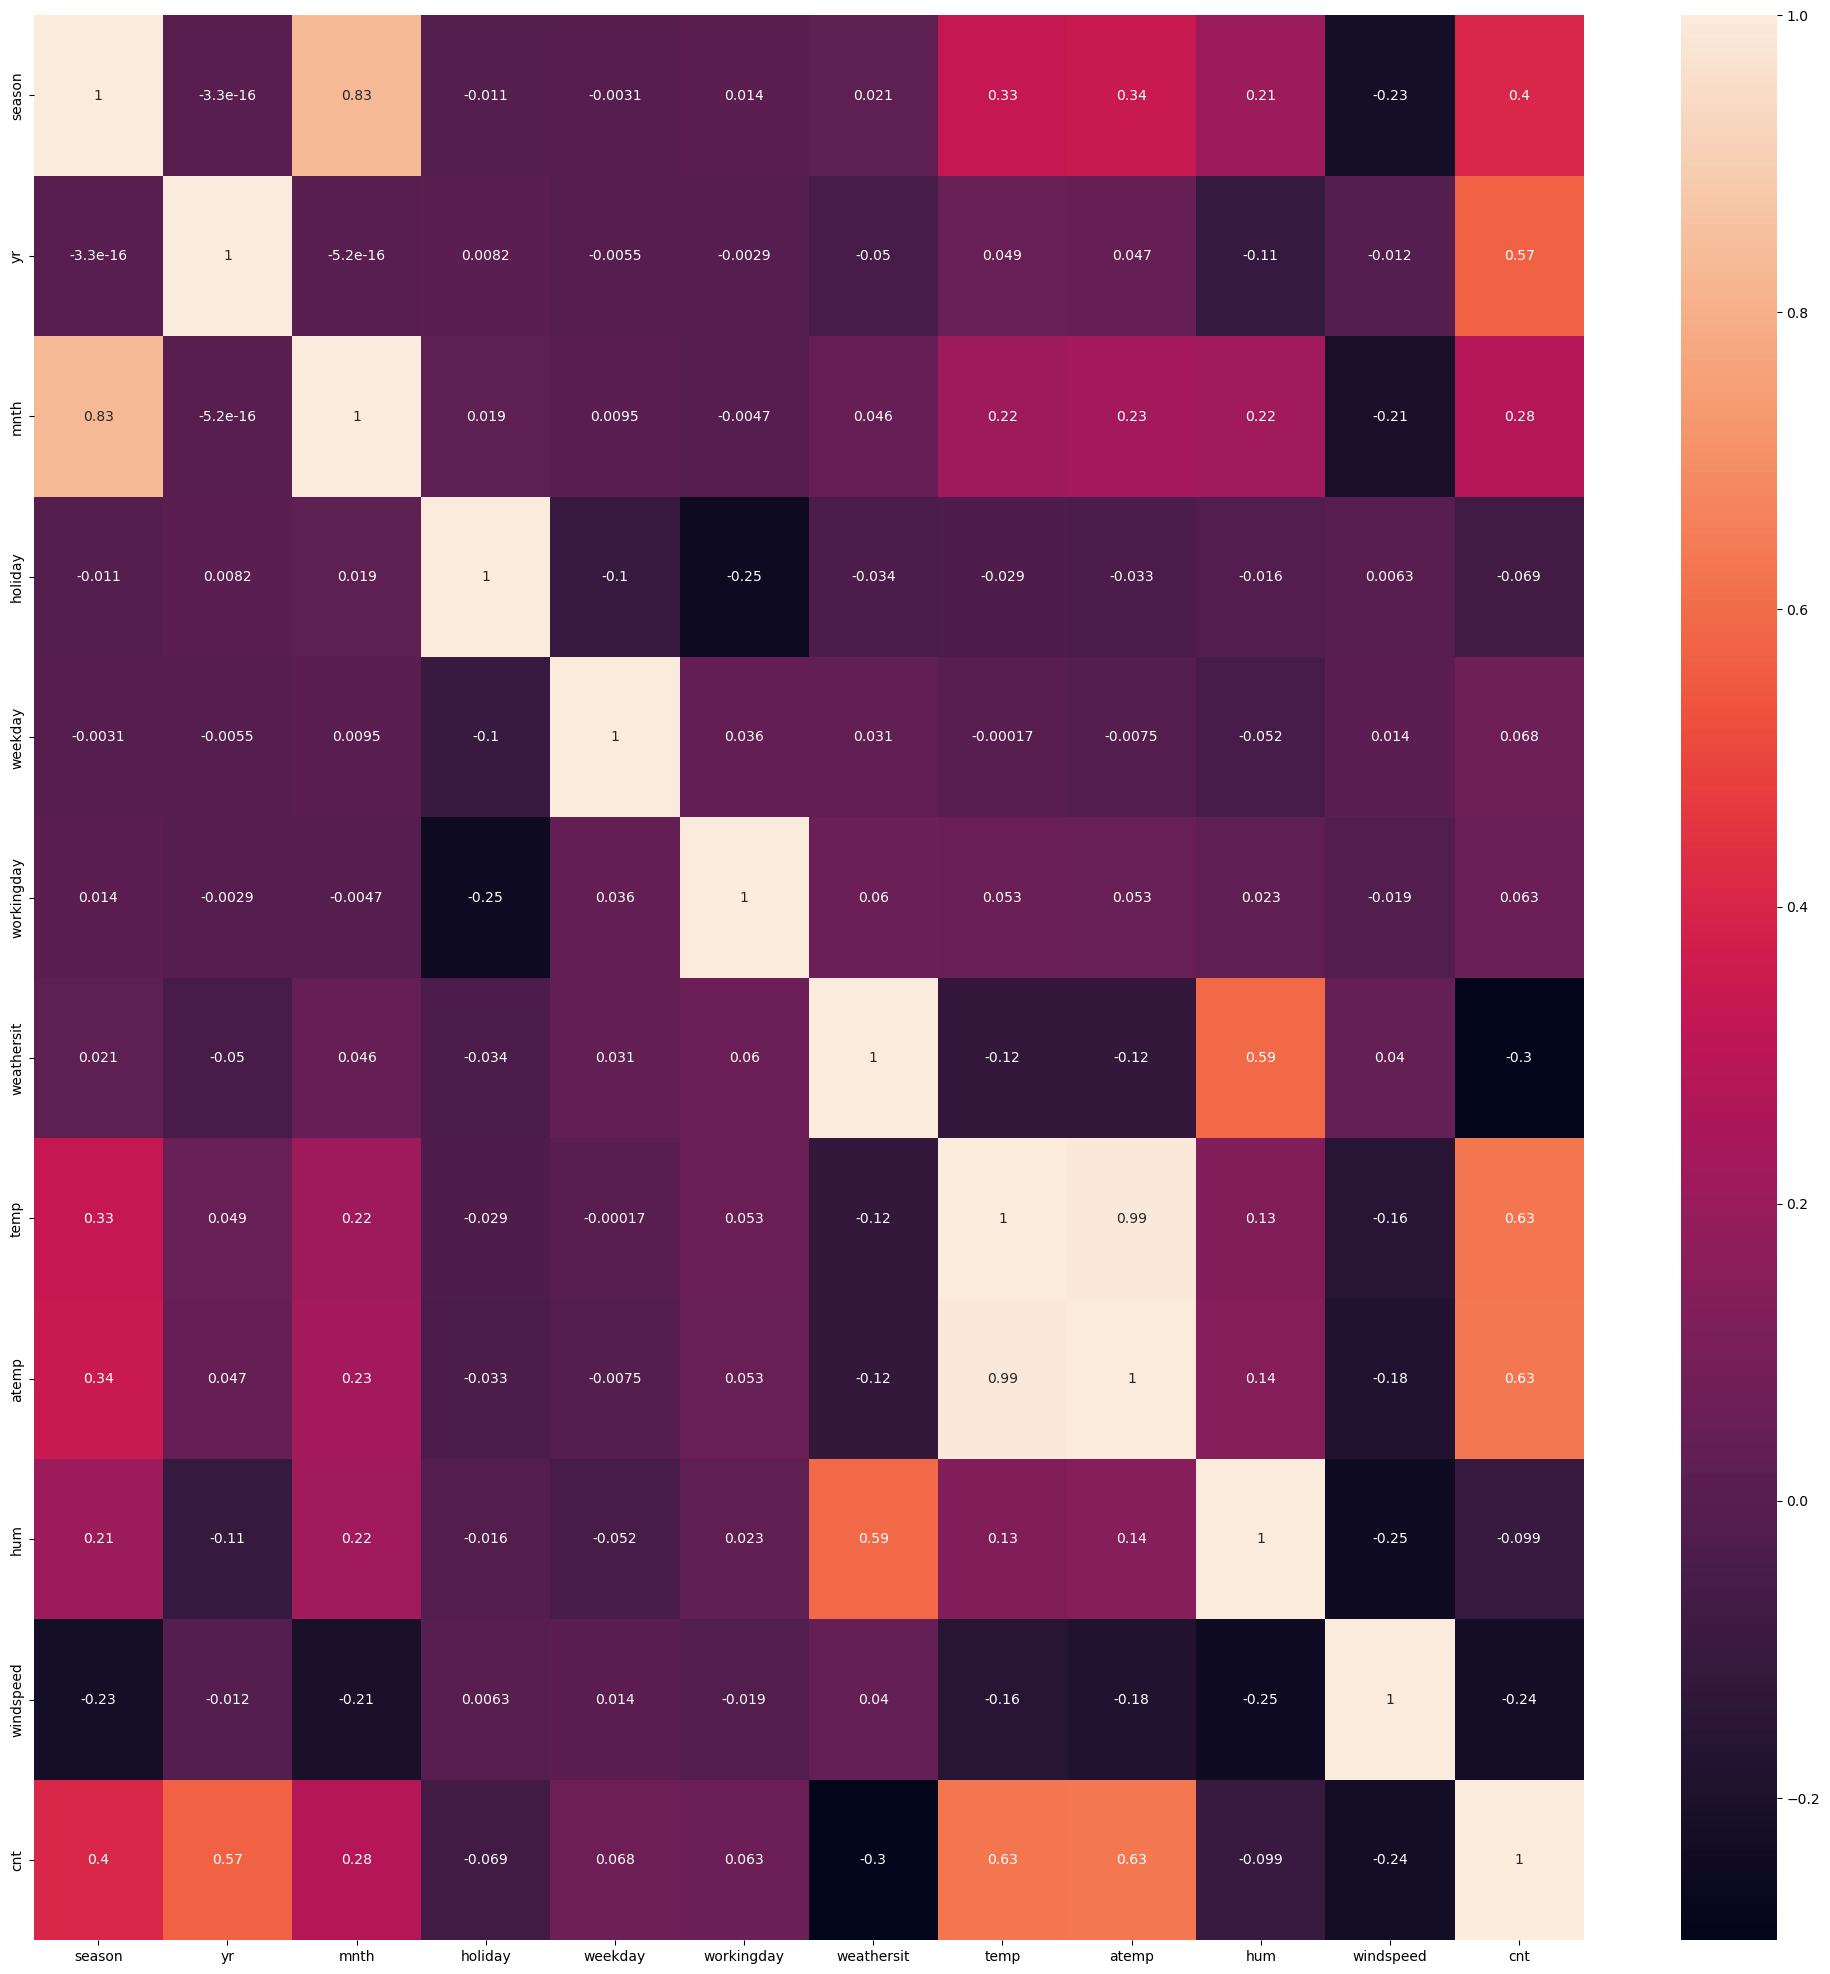

In [11]:
#PLotting heatmap and observing the correlation
plt.figure(figsize=(25,25))
sns.heatmap(bikes.corr(), annot=True)

##### We can observe that the variables 'temp', 'atemp', 'yr' have more correlation with 'cnt'. This shows that the temperature has more influence on the bike hiring

### Preparing the data for modelling

In [12]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [13]:
#Converting categorical variables to same dtype
for i in ['season','mnth','weekday','weathersit']:
    bikes[i]=bikes[i].astype('category')

In [14]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [15]:
# Creating dummy variables
bikes=pd.get_dummies(bikes, drop_first=True, dtype='uint8')
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

#### train-test split

##### train-test split is done in 70:30 ratio

In [16]:
bikes_train, bikes_test = train_test_split(bikes,train_size=0.7,random_state=100)

In [17]:
print(bikes_train.shape)
print(bikes_test.shape)

(510, 30)
(220, 30)


##### It is important to have all the attributes in the same scale. So, Min-Max scaling needs to be done

In [18]:
#Min Max Scaling
scaler=MinMaxScaler()

#Fit on numerical variables
bikes_train[num_col]=scaler.fit_transform(bikes_train[num_col])

bikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,1,0,1,0


In [19]:
bikes_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### We can see that all the numeric values were converted in the scale 0-1

### Training the model

In [20]:
#Splitting the training data into X and y
y_train=bikes_train.pop('cnt')
X_train=bikes_train

In [21]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [22]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

##### Before training, it is required to rank the columns based on RFE and drop all the unnecessary ones

In [23]:
#creating a Linear Regression object
lm=LinearRegression()

lm.fit(bikes_train,y_train)

#running RFE
rfe=RFE(lm,step=12)
rfe=rfe.fit(X_train, y_train)

In [24]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 3),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 3),
 ('season_4', True, 1),
 ('mnth_2', False, 3),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 3),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 3),
 ('mnth_12', False, 3),
 ('weekday_1', False, 3),
 ('weekday_2', False, 3),
 ('weekday_3', False, 3),
 ('weekday_4', False, 3),
 ('weekday_5', False, 3),
 ('weekday_6', False, 2),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [25]:
col=X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'hum', 'windspeed', 'season_2', 'season_4', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

##### We can have only the columns supported by RFE

In [26]:
X_train_rfe=X_train[col]
X_train_rfe.head()

,yr,temp,hum,windspeed,season_2,season_4,mnth_3,mnth_4,mnth_5,mnth_8,mnth_9,mnth_10,weathersit_2,weathersit_3
576,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1,0.442393,0.640189,0.255342,0,0,1,0,0,0,0,0,1,0
728,1,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0
482,1,0.395666,0.504508,0.188475,1,0,0,1,0,0,0,0,1,0
111,0,0.345824,0.751824,0.380981,1,0,0,1,0,0,0,0,1,0


##### For better understanding, we can rename a few columns
##### season_2- summer
##### season_4- winter
##### mnth_3- march
##### mnth_4- april
##### mnth_5- may
##### mnth_8- august
##### mnth_9- september
##### mnth_10- october
##### weathersit_2- mist
##### weathersit_3- light_snow

In [27]:
X_train_rfe.rename(columns = {'season_2':'summer'}, inplace = True) 
X_train_rfe.rename(columns = {'season_4':'winter'}, inplace = True) 
X_train_rfe.rename(columns = {'mnth_3':'march'}, inplace = True) 
X_train_rfe.rename(columns = {'mnth_4':'april'}, inplace = True)
X_train_rfe.rename(columns = {'mnth_5':'may'}, inplace = True) 
X_train_rfe.rename(columns = {'mnth_8':'august'}, inplace = True)
X_train_rfe.rename(columns = {'mnth_9':'september'}, inplace = True)
X_train_rfe.rename(columns = {'mnth_10':'october'}, inplace = True)
X_train_rfe.rename(columns = {'weathersit_2':'mist'}, inplace = True) 
X_train_rfe.rename(columns = {'weathersit_3':'light_snow'}, inplace = True) 

In [28]:
X_train_rfe.head()

,yr,temp,hum,windspeed,summer,winter,march,april,may,august,september,october,mist,light_snow
576,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1,0.442393,0.640189,0.255342,0,0,1,0,0,0,0,0,1,0
728,1,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0
482,1,0.395666,0.504508,0.188475,1,0,0,1,0,0,0,0,1,0
111,0,0.345824,0.751824,0.380981,1,0,0,1,0,0,0,0,1,0


##### Now, we can build the model with all the predictor variables

In [29]:
#Computing VIF
def vif(X_train_rfe):
    vif=pd.DataFrame()
    vif['Features']=X_train_rfe.columns
    vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif

In [30]:
vif(X_train_rfe)

,Features,VIF
2,hum,14.81
1,temp,10.20
4,summer,4.06
3,windspeed,3.85
5,winter,2.34
8,may,2.23
7,april,2.21
12,mist,2.13
0,yr,2.03
9,august,1.62


In [31]:
#build a model with all variables

# Add a constant- as we are using statsmodel
X_train_rfe=sm.add_constant(X_train_rfe)

#create model
lr=sm.OLS(y_train,X_train_rfe)

#fit
lr_model1=lr.fit()

#params
lr_model1.params

const         0.231288
yr            0.229029
temp          0.541618
hum          -0.188920
windspeed    -0.192658
summer        0.092211
winter        0.139916
march         0.032890
april         0.015750
may           0.031585
august        0.063745
september     0.128399
october       0.037201
mist         -0.051154
light_snow   -0.233868
dtype: float64

In [32]:
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.5
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.53e-186
Time:                        22:10:53   Log-Likelihood:                 506.02
No. Observations:                 510   AIC:                            -982.0
Df Residuals:                     495   BIC:                            -918.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2313      0.028      8.306      0.000       0.177       0.286
yr             0.2290      0.008     27.956      0.000       0.213       0.245
temp           0.5416      0.023     23.485      0.000       0.496       0.587
hum           -0.1889      0.038     -4.941      0.000      -0.264      -0.114
windspeed     -0.1927      0.026     -7.390      0.000      -0.244      -0.141
summer         0.0922      0.016      5.637      0.000       0.060       0.124
winter         0.1399      0.013     11.186      0.000       0.115       0.164
march          0.0329      0.015      2.141      0.033       0.003       0.063
april          0.0158      0.021      0.734      0.463      -0.026       0.058
may            0.0316      0.021      1.519      0.129      -0.009       0.072
august         0.0637      0.017      3.839      0.000       0.031       0.096
september      0.1284      0.017      7.733      0.000       0.096       0.161
october        0.0372      0.018      2.103      0.036       0.002       0.072
mist          -0.0512      0.011     -4.843      0.000      -0.072      -0.030
light_snow    -0.2339      0.027     -8.772      0.000      -0.286      -0.181
==============================================================================
Omnibus:                       74.244   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.130
Skew:                          -0.753   Prob(JB):                     7.68e-40
Kurtosis:                       5.491   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### The variables can be dropped based on 2 parameters:
##### 1) Based on significance (p-values)
##### 2) VIF

##### There are several possibilities:
##### 1) High P value, High VIF
##### 2) High P value, Low VIF
##### 3) Low P value, High VIF
##### 4) Low P value, Low VIF

##### We can surely say that the variables can be dropped in case 1 and retained in case 4. But, case 2 and case 3 are the ones to be analyzed
##### We can start by dropping one variab

##### The variable 'april' has the highest p value (0.142)

In [33]:
X_train_rfe = X_train_rfe.drop(['april'], axis=1)

In [34]:
#checking vif
vif(X_train_rfe)

,Features,VIF
0,const,47.43
3,hum,1.91
6,winter,1.78
5,summer,1.74
2,temp,1.63
12,mist,1.55
8,may,1.51
11,october,1.48
9,august,1.47
10,september,1.25


In [35]:
#building the model again

#create model
lr=sm.OLS(y_train,X_train_rfe)

#fit
lr_model2=lr.fit()

#params
lr_model2.params

const         0.232768
yr            0.229318
temp          0.539090
hum          -0.189737
windspeed    -0.190645
summer        0.100101
winter        0.139256
march         0.029171
may           0.023726
august        0.064163
september     0.128763
october       0.037526
mist         -0.051183
light_snow   -0.233632
dtype: float64

In [36]:
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     199.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.39e-187
Time:                        22:10:54   Log-Likelihood:                 505.75
No. Observations:                 510   AIC:                            -983.5
Df Residuals:                     496   BIC:                            -924.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2328      0.028      8.386      0.000       0.178       0.287
yr             0.2293      0.008     28.037      0.000       0.213       0.245
temp           0.5391      0.023     23.651      0.000       0.494       0.584
hum           -0.1897      0.038     -4.966      0.000      -0.265      -0.115
windspeed     -0.1906      0.026     -7.357      0.000      -0.242      -0.140
summer         0.1001      0.012      8.124      0.000       0.076       0.124
winter         0.1393      0.012     11.167      0.000       0.115       0.164
march          0.0292      0.014      2.013      0.045       0.001       0.058
may            0.0237      0.018      1.332      0.183      -0.011       0.059
august         0.0642      0.017      3.868      0.000       0.032       0.097
september      0.1288      0.017      7.762      0.000       0.096       0.161
october        0.0375      0.018      2.123      0.034       0.003       0.072
mist          -0.0512      0.011     -4.848      0.000      -0.072      -0.030
light_snow    -0.2336      0.027     -8.768      0.000      -0.286      -0.181
==============================================================================
Omnibus:                       74.871   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.332
Skew:                          -0.758   Prob(JB):                     2.55e-40
Kurtosis:                       5.506   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### We can see that 'may' has a high P value (0.183) and it can be dropped

In [37]:
X_train_rfe = X_train_rfe.drop(['may'], axis=1)

In [38]:
#checking vif
vif(X_train_rfe)

,Features,VIF
0,const,46.76
3,hum,1.86
6,winter,1.78
2,temp,1.62
11,mist,1.55
10,october,1.48
8,august,1.46
5,summer,1.38
9,september,1.24
12,light_snow,1.24


In [39]:
#building the model again

#create model
lr=sm.OLS(y_train,X_train_rfe)

#fit
lr_model3=lr.fit()

#params
lr_model3.params

const         0.228354
yr            0.228919
temp          0.541180
hum          -0.181982
windspeed    -0.191756
summer        0.107554
winter        0.138491
march         0.026215
august        0.062312
september     0.126998
october       0.036873
mist         -0.051510
light_snow   -0.236035
dtype: float64

In [40]:
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     216.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.23e-188
Time:                        22:10:55   Log-Likelihood:                 504.84
No. Observations:                 510   AIC:                            -983.7
Df Residuals:                     497   BIC:                            -928.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2284      0.028      8.279      0.000       0.174       0.283
yr             0.2289      0.008     27.986      0.000       0.213       0.245
temp           0.5412      0.023     23.781      0.000       0.496       0.586
hum           -0.1820      0.038     -4.816      0.000      -0.256      -0.108
windspeed     -0.1918      0.026     -7.398      0.000      -0.243      -0.141
summer         0.1076      0.011      9.790      0.000       0.086       0.129
winter         0.1385      0.012     11.109      0.000       0.114       0.163
march          0.0262      0.014      1.829      0.068      -0.002       0.054
august         0.0623      0.017      3.767      0.000       0.030       0.095
september      0.1270      0.017      7.674      0.000       0.094       0.160
october        0.0369      0.018      2.086      0.038       0.002       0.072
mist          -0.0515      0.011     -4.876      0.000      -0.072      -0.031
light_snow    -0.2360      0.027     -8.872      0.000      -0.288      -0.184
==============================================================================
Omnibus:                       74.023   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.783
Skew:                          -0.762   Prob(JB):                     1.83e-38
Kurtosis:                       5.419   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
###### 'march' can be dropped as it's p-value is more than 0.05
X_train_rfe = X_train_rfe.drop(['march'], axis=1)

In [42]:
#checking vif
vif(X_train_rfe)

,Features,VIF
0,const,45.82
3,hum,1.86
6,winter,1.71
2,temp,1.59
10,mist,1.55
9,october,1.48
7,august,1.45
5,summer,1.38
8,september,1.24
11,light_snow,1.24


In [43]:
#building the model again

#create model
lr=sm.OLS(y_train,X_train_rfe)

#fit
lr_model4=lr.fit()

#params
lr_model4.params

const         0.235502
yr            0.229116
temp          0.535069
hum          -0.183432
windspeed    -0.189026
summer        0.107512
winter        0.133982
august        0.060166
september     0.125191
october       0.037267
mist         -0.051335
light_snow   -0.234101
dtype: float64

In [44]:
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          7.50e-189
Time:                        22:10:56   Log-Likelihood:                 503.13
No. Observations:                 510   AIC:                            -982.3
Df Residuals:                     498   BIC:                            -931.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2355      0.027      8.605      0.000       0.182       0.289
yr             0.2291      0.008     27.946      0.000       0.213       0.245
temp           0.5351      0.023     23.714      0.000       0.491       0.579
hum           -0.1834      0.038     -4.844      0.000      -0.258      -0.109
windspeed     -0.1890      0.026     -7.287      0.000      -0.240      -0.138
summer         0.1075      0.011      9.763      0.000       0.086       0.129
winter         0.1340      0.012     10.938      0.000       0.110       0.158
august         0.0602      0.017      3.638      0.000       0.028       0.093
september      0.1252      0.017      7.561      0.000       0.093       0.158
october        0.0373      0.018      2.103      0.036       0.002       0.072
mist          -0.0513      0.011     -4.849      0.000      -0.072      -0.031
light_snow    -0.2341      0.027     -8.785      0.000      -0.286      -0.182
==============================================================================
Omnibus:                       73.436   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.215
Skew:                          -0.738   Prob(JB):                     2.71e-40
Kurtosis:                       5.529   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### We can now see all the variables have P value < 0.05 and VIF <5. This shows that all the variables are significant and there is less multicollinearity
##### R square value- 0.838
##### Adjuste R square value- 0.834

### Residual Analysis

In [45]:
y_train_pred=lr_model4.predict(X_train_rfe)
y_train_pred.head()

576    0.717652
426    0.484296
728    0.379058
482    0.604334
111    0.266795
dtype: float64

<Axes: ylabel='Density'>

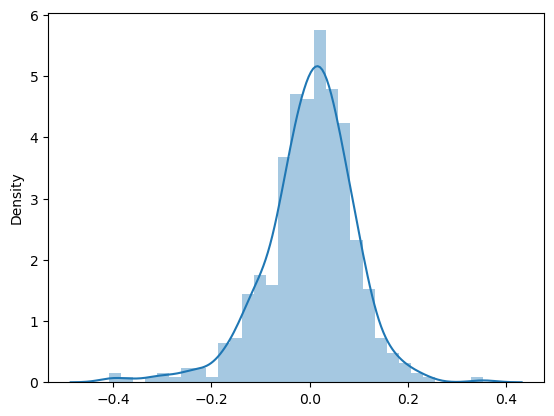

In [46]:
res=y_train-y_train_pred
sns.distplot(res)

##### We can see that we get a binomial distribution with mean at 0

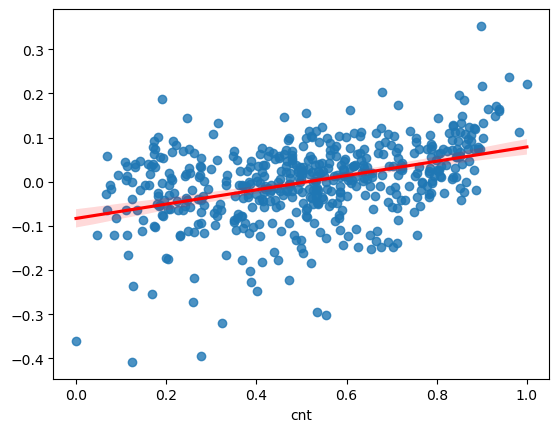

In [47]:
#homoscedasticity
sns.regplot(x=y_train, y=res, fit_reg=True, line_kws={'color':'red'})
plt.show()

##### We can see that there is no pattern for variance

### Predictions and evaluation on test set

##### We did a lot of preprocessing on the testing set. We need to do the same on the test set too

In [48]:
bikes_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,1,0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
bikes_test[num_col]=scaler.transform(bikes_test[num_col])

In [50]:
bikes_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,...,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,...,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
#Creating X and y for test
y_test=bikes_test.pop('cnt')
X_test=bikes_test

In [52]:
X_train_rfe.columns

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'summer', 'winter', 'august',
       'september', 'october', 'mist', 'light_snow'],
      dtype='object')

In [53]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

##### We can drop all the unwanted columns and have only rfe supported ones as it was in X_test_rfe. Also, we have to rename a few column names

In [54]:
X_test.rename(columns = {'season_2':'summer'}, inplace = True) 
X_test.rename(columns = {'season_4':'winter'}, inplace = True) 
X_test.rename(columns = {'mnth_3':'march'}, inplace = True) 
X_test.rename(columns = {'mnth_4':'april'}, inplace = True)
X_test.rename(columns = {'mnth_5':'may'}, inplace = True) 
X_test.rename(columns = {'mnth_8':'august'}, inplace = True)
X_test.rename(columns = {'mnth_9':'september'}, inplace = True)
X_test.rename(columns = {'mnth_10':'october'}, inplace = True)
X_test.rename(columns = {'weathersit_2':'mist'}, inplace = True) 
X_test.rename(columns = {'weathersit_3':'light_snow'}, inplace = True) 

In [55]:
#List of rfe supported columns
rfe=['yr', 'temp', 'hum', 'windspeed', 'summer', 'winter', 'august',
       'september', 'october', 'mist', 'light_snow']

In [56]:
X_test=X_test[rfe]

In [57]:
X_test.head()

,yr,temp,hum,windspeed,summer,winter,august,september,october,mist,light_snow
184,0,0.831783,0.657364,0.084219,0,0,0,0,0,1,0
535,1,0.901354,0.610133,0.153728,1,0,0,0,0,0,0
299,0,0.511964,0.837699,0.334206,0,1,0,0,1,1,0
221,0,0.881625,0.437098,0.339570,0,0,1,0,0,0,0
152,0,0.817246,0.314298,0.537414,1,0,0,0,0,0,0


In [58]:
# Add a constant- as we are using statsmodel
X_test=sm.add_constant(X_test)

X_test.head()

,const,yr,temp,hum,windspeed,summer,winter,august,september,october,mist,light_snow
184,1.0,0,0.831783,0.657364,0.084219,0,0,0,0,0,1,0
535,1.0,1,0.901354,0.610133,0.153728,1,0,0,0,0,0,0
299,1.0,0,0.511964,0.837699,0.334206,0,1,0,0,1,1,0
221,1.0,0,0.881625,0.437098,0.339570,0,0,1,0,0,0,0
152,1.0,0,0.817246,0.314298,0.537414,1,0,0,0,0,0,0


In [59]:
X_test.shape

(220, 12)

In [60]:
X_test.columns

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'summer', 'winter', 'august',
       'september', 'october', 'mist', 'light_snow'],
      dtype='object')

In [61]:
#predict
y_test_pred=lr_model4.predict(X_test)

##### As we have tested the model, we can evaluate the r2 score of it

In [62]:
#evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8092723757097982

In [63]:
# Adjusted r-squared
adj_r2 = 1 - (1-r2_score(y_test, y_test_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adj_r2

0.7982157018379024

##### As we can see, the r2 score and adjusted r2 score values of the tested model is almost closer to the one derived from the trained model

### Final observations and inference

##### Training data values:
#####    -> R2 square- 0.838
#####    -> Adjusted R2 square- 0.834
##### Test data values:
#####    -> R2 square- 0.81
#####    -> Adjusted R2 square- 0.80

In [64]:
# coefficients
round(lr_model4.params,2)

const         0.24
yr            0.23
temp          0.54
hum          -0.18
windspeed    -0.19
summer        0.11
winter        0.13
august        0.06
september     0.13
october       0.04
mist         -0.05
light_snow   -0.23
dtype: float64

##### Line eqn:
##### cnt=0.23yr + 0.54temp - 0.18hum - 0.19windspeed + 0.11summer+ 0.13winter + 0.06august + 0.13september + 0.04october - 0.05mist - 0.23light_snow

##### KEY VARIABLES:
##### 1) Year
##### 2) Temperature
##### 3) Humidity
##### 4) Windspeed
##### 5) Summer
##### 6) Winter
##### 7) August
##### 8) September
##### 9) October
##### 10) Mist
##### 11) Light Snow

##### INFERENCE:
##### 1) The bike hiring increases by 0.23 times every year
##### 2) As temperature increases by 1, bike hiring increases by 0.54 times
##### 3) As humidty increases by 1, bike hiring decreases by 0.18 times
##### 4) As windspeed increases by 1, bike hiring decreases by 0.19 times
##### 5) The bike hiring increases by 0.11 times in summer, 0.13 times in winter
##### 6) The bike hiring increases by 0.06 times in August, 0.13 times in September and 0.04 times in October
##### 7) During mist, the bike hiring decreases by 0.05 times and during light snow, it decreases by 0.23 times